In [1]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose

from MDS import *

pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

import warnings
warnings.filterwarnings('ignore')

mds_from_d_3D = MDS(3,dissimilarity='euclidean')
mds_from_d_2D = MDS(2,dissimilarity='euclidean')


/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:952: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f'$\lambda_k$')
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:965: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel(f"$\epsilon$")
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1029: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f'$\lambda_k$')
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1041: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel(f"$\epsilon$")
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1104: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f'$\lambda_k$')
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1116: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel(f"$\epsilon$")
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1189: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f'$\lambda_k$')
/Users/mcgirard/Dev/Quantum_emergent_dimension/MDS.py:1201: SyntaxWarning:

Shape of the matrix: (355, 355)
Data type: float64
[[0.8184 0.9863 0.9372 1.0294 0.9962 1.0227 0.9265 0.8977 0.8679 0.9683
  ... 0.9611 1.143  0.9701 1.054  0.883  0.9563 0.9327 0.9651 0.9663
  0.9333]
 [0.9863 1.0394 0.9861 1.0432 1.0196 1.0425 1.0716 1.0332 0.9043 1.0131
  ... 0.9708 0.9828 1.0076 1.1486 1.0136 0.9983 1.0038 1.0013 1.0209
  1.0035]
 [0.9372 0.9861 1.0285 0.9892 0.9943 0.9859 1.0438 1.0106 0.8774 0.9736
  ... 0.9681 0.9456 1.0108 1.0073 0.9771 0.9669 0.972  0.9767 0.9985
  0.9729]
 [1.0294 1.0432 0.9892 1.0468 1.016  1.0697 1.0566 1.0621 0.8989 1.0008
  ... 0.9732 0.9767 1.0062 1.0561 1.0552 0.9985 1.0349 0.9982 1.0181
  1.0009]
 [0.9962 1.0196 0.9943 1.016  1.0429 1.0338 1.0577 1.0229 0.908  1.0014
  ... 0.9913 0.9843 1.0181 1.0858 1.0488 0.9968 1.0205 1.0073 1.0151
  1.0013]]
Min value: 0.7225812832116604
Max value: 1.3159294921048241
Mean value: 1.0130612421418552


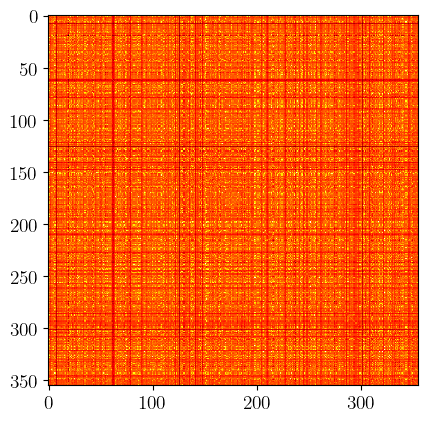

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Load the .npy file
data = np.load('information_matrix_emergent_qubits_neff5.npy')

# Print the shape and data type of the matrix
print(f"Shape of the matrix: {data.shape}")
print(f"Data type: {data.dtype}")

# Display a preview of the matrix (first 5 rows)
print(data[:5])

# If the matrix is very large, you can use this to view its statistics
print(f"Min value: {data.min()}")
print(f"Max value: {data.max()}")
print(f"Mean value: {data.mean()}")

plt.imshow(data, cmap='hot', interpolation='nearest')


Convert the I matrix into a distance matrix


In [3]:
file_name="information_matrix_emergent_qubits_neff5.npy"
#redef distance right here so i can play around with the values to make it computable...
def distance(w):
    N=w.shape[0]
    dab=np.zeros((N,N))    
    for a in range(N):
        print(a)
        for b in range(a+1,N):
            weights = [calculate_path_weight(w, path) for path in find_all_paths(w, a, b, 3)]
            dab[a][b]=min(weights)
            dab[b][a]=dab[a][b]
    return dab

re_wweighing
re_weighted
calculating distance
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265


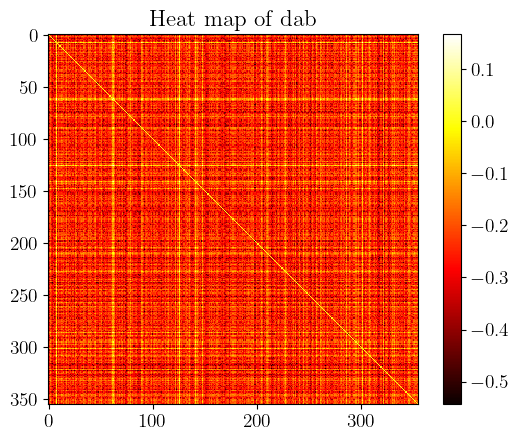

In [15]:
file_name="information_matrix_emergent_qubits_neff5.npy"
I=np.load(file_name)
outputs_dir = "outputs"
if not os.path.exists(outputs_dir):
    os.makedirs(outputs_dir)
I_file_path = os.path.join(outputs_dir, "I" + file_name)
np.save(I_file_path, I)

#define_graph(I)
print("re_wweighing")
w=re_weighing(I)
print("re_weighted")
w_file_path = os.path.join(outputs_dir, "w" + file_name)
np.save(w_file_path,w)
print("calculating distance")
dab=distance(w)
print("calculated distance")
d_file_path = os.path.join(outputs_dir, "d" + file_name)
np.save(d_file_path,dab)

plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of dab")
plt.colorbar()
plt.show()
#print("Graph of distances")
#define_graph(dab)

In [5]:
N=355
outputs_dir="outputs"
d_file_path = os.path.join(outputs_dir, "d" + file_name)
dab = np.load(d_file_path)

getting eigenvalues
got eigenvalues


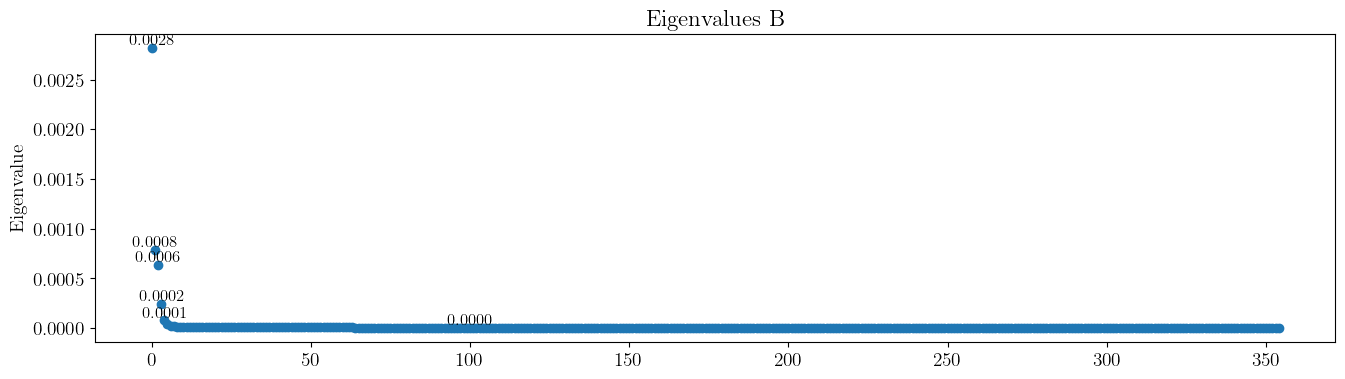

getting strss
got stress


In [10]:
print("getting eigenvalues")
eigen=get_eigenvalues_B_from_dab(dab,N,file_name,False)
print("got eigenvalues")
eigen=eigen/(N*max(eigen))

# Assuming 'eigen' is already defined
plt.figure(figsize=(16,4))
plt.scatter(range(len(eigen)), eigen)

# Add labels for the first 4 points
for i in range(5):
    plt.text(i, eigen[i], f'{eigen[i]:.4f}', fontsize=12, ha='center', va='bottom')
plt.text(100, eigen[100], f'{eigen[100]:.4f}', fontsize=12, ha='center', va='bottom')
plt.title("Eigenvalues B")
plt.ylabel("Eigenvalue")

# Save the plot
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'eigenvalues_{file_name}.png'))
plt.show()

print("getting strss")
stress=get_stress(dab,False)
print("got stress")
plt.scatter(range(1,len(stress)+1),stress)
plt.title("Stress")
plt.xlabel("Embedding dimension")
plt.ylabel("Stress")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'stress_{file_name}.png'))
plt.show()


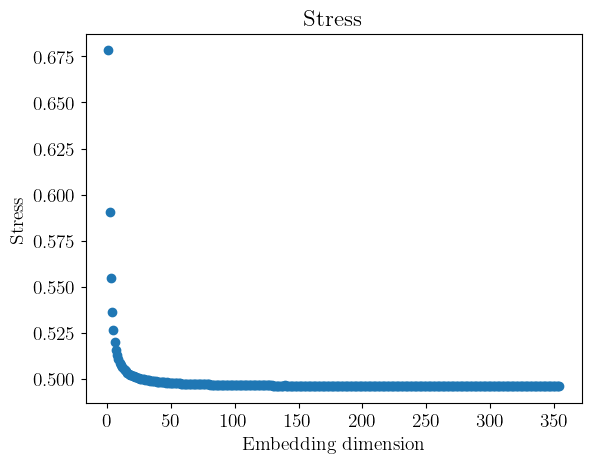

In [12]:
plt.scatter(range(1,len(stress)+1),stress)
plt.title("Stress")
plt.xlabel("Embedding dimension")
plt.ylabel("Stress")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'stress_{file_name}.png'))
plt.show()


In [7]:
def mapData(dab, plot=True):
    """takes a distance matrix, and maps it in 2D and 3D"""
    #Using https://stackabuse.com/guide-to-multidimensional-scaling-in-python-with-scikit-learn/
    mds_from_d_3D = MDS(3,dissimilarity='euclidean')
    mds_from_d_2D = MDS(2,dissimilarity='euclidean')
    # Get the embeddings
    y=ar(range(len(dab)))
    y=strings = [str(num) for num in y]
    X2 = mds_from_d_2D.fit_transform(dab)
    X3=mds_from_d_3D.fit_transform(dab)
    # Plot the embedding, colored according to the class of the points
    #fig, ax = plt.subplots(figsize=(6, 6))
    m1=np.max(abs(X2))
    m=np.max(abs(X3))
    if plot:
        plt.scatter(x=X2[:, 0], y=X2[:, 1],s=10)
        plt.title('2D mapping')
#        for i in range(len(X2)):
#            plt.text(X2[i, 0], X2[i, 1], y[i], fontsize=12)
        plt.xlim([-m1, m1])
        plt.ylim([-m1, m1])
        plt.show()

    #scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1])
    
        

        fig = go.Figure(data=go.Scatter3d(x=X3[:, 0], y=X3[:, 1], z=X3[:, 2], mode='markers', marker=dict(size=3)))
        fig.update_layout(title='3D Plot of Points', scene=dict(xaxis=dict(title='X-axis'),
                                                            yaxis=dict(title='Y-axis'),
                                                            zaxis=dict(title='Z-axis')))
        fig.update_layout(
        scene=dict(
            xaxis=dict(range=[-m, m]),
            yaxis=dict(range=[-m, m]),
            zaxis=dict(range=[-m, m]),
            aspectmode='cube'))
        
        # Add labels to the scatter plot
#        for i in range(len(X3)):
#            fig.add_trace(
#                go.Scatter3d(
#                    x=[X3[i, 0]],
#                    y=[X3[i, 1]],
#                    z=[X3[i, 2]],
#                    mode='text',
#                    text=y[i],
#                    textfont=dict(
#                        size=12,
#                        color='black'
#                    ),
#                    hoverinfo='none'
#                )
#            )
        fig.show()
    else:
        return X2,X3,m1,m

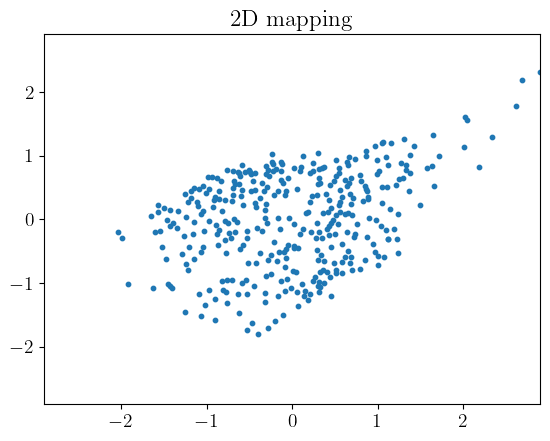

In [8]:
mapData(dab)

1D ness of the thermal states. Unexplained. is it related to the decay of correlations for k-local Hamiltonians?